##***Prediction of Wine Quality***

# Problem Statement:

Wine quality is a metric in the winemaking industry that can 'make or break' the success seen by a vineyard. Reviews and scoring are used in shaping consumer preferences, guiding production standards, and determining market success. For my final project, I wanted to develop a predictive model capable of accurately estimating the quality of red wines. I come from an Italian/English family that loves red wine, so when I was parsing through datasets on Kaggle, this caught my eye. The dataset I found focuses specifically on Portugal's renowned "Vinho Verde" variety. Vinho Verde, a traditional wine from the northern region of Portugal, comes in both red and white wine. While the white variant is more widely recognized for its light, crisp taste, the red Vinho Verde is equally unique, offering bold flavors and a distinct tartness. Both wines are renowned for their versatility and refreshing qualities. I have actually had the pleasure of trying Vinho Verde (Professor Koehler, I am 21 years old :) btw) when I noticed it was available at Astor Wines. I had the 2022 Vinho Verde "Biotite" by António Lopes Ribeiro, and it was quite good!

This project will focus specifically on the red variant of Vinho Verde, utilizing a dataset of 'physicochemical' properties and sensory outputs to predict wine quality scores on a scale from 0 to 10 (although the scores range in the dataset from 3 to 8). These scores, typically determined through analysis by wine experts, reflect the wine's success with consumers. Developing a predictive model like this could have the potential to provide valuable insights into how specific chemical properties, such as acidity, sugar content, pH, and alcohol, can impact the perceived quality of a bottle of wine. Producers, winemakers, or vineyard owners can use these insights to make changes to their production methods, ensure better consistency, and create wines that align more closely with consumer expectations based on the model's findings.




##Dataset Description:

The dataset used for this project is sourced from Kaggle and contains detailed information on the properties of red Vinho Verde wines. This dataset includes features such as fixed acidity, volatile acidity, citric acid, residual sugar, pH, sulfur dioxide levels, alcohol content, and other variables that influence the overall profile of red wines. Additionally, it contains a wine quality score assigned by trained tasters, which serves as the target variable for the regression model. While this data provides a great amount of information, challenges may arise due to potential outliers in the dataset, as well as the naturally subjective nature of wine quality scoring. Before diving into testing, I will take a few steps to clean the data and address any missing values or anomalies that may come up.



#Lets take a look at my dataset!

lets import all necesarry tools, look at my columns, and check for null variables

In [247]:
import kagglehub
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
from scipy.stats import pearsonr

In [300]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [250]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
file_path = "/content/drive/MyDrive/winequality-red.csv"
wine = pd.read_csv(file_path)

In [253]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [254]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [255]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Amazing! No null values from the dataset

Lets also take a quick look at the minimums and maxiums in my dataset to get a better understanding of the ranges of my data

In [256]:
print(wine.agg(["min", "max"]))

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
min            4.6              0.12          0.0             0.9      0.012   
max           15.9              1.58          1.0            15.5      0.611   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
min                  1.0                   6.0  0.99007  2.74       0.33   
max                 72.0                 289.0  1.00369  4.01       2.00   

     alcohol  quality  
min      8.4        3  
max     14.9        8  


#Lets create some graphs to visualize the data!

I'd like to test the variables to get a better grasp on the distribution of the data columns in the dataset. This will also allow me to see if any of the variables point towards a correlation with quality

<Axes: >

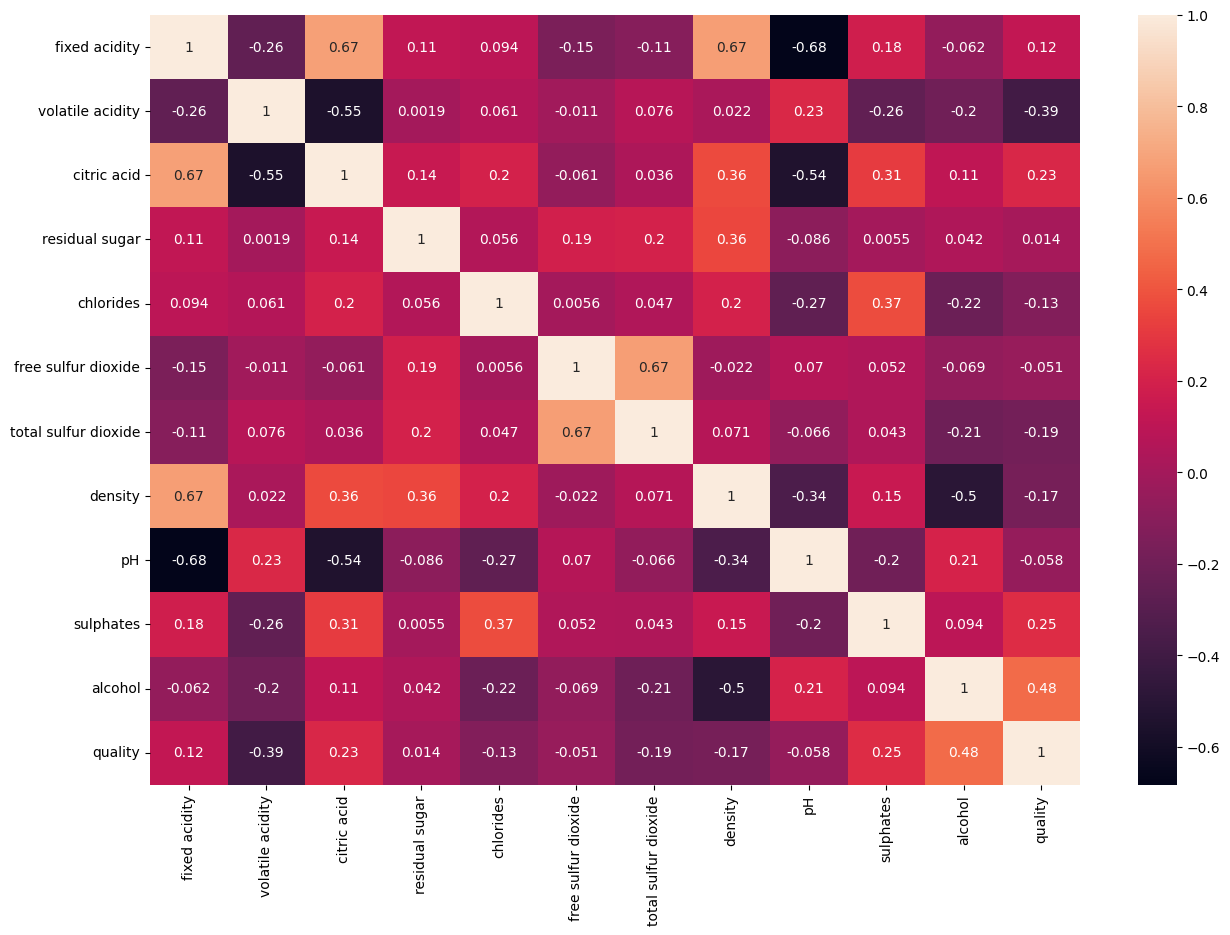

In [257]:
plt.figure(figsize=(15, 10))
sns.heatmap(wine.corr(), annot=True)

Simlar to a test I performed in my midterm project, I will look to identify which numerical features have the strongest correlation with quality in the wine dataset and determine the statistical significance of these relationships. I will do this by calculating Pearson correlation coefficients and p-values for all numerical features against the target quality and then sort them into a
DataFrame to rank features based on their correlation strengths.

In [258]:
cors = []
ps = []
for col in wine.select_dtypes(include=['number']).columns:
  if col != "quality":
     cor, p = pearsonr(wine[col], wine["quality"])
     cors.append(cor)
     ps.append(p)

In [259]:
numerical = wine.select_dtypes(include=['number']).columns
numerical = numerical[numerical != "quality"]

pd.DataFrame({'cors': cors, 'ps': ps}, index=numerical).sort_values(by="cors", ascending=False)

,cors,ps
alcohol,0.476166,2.831477e-91
sulphates,0.251397,1.802088e-24
citric acid,0.226373,4.991295e-20
fixed acidity,0.124052,6.495635e-07
residual sugar,0.013732,5.832180e-01
free sulfur dioxide,-0.050656,4.283398e-02
pH,-0.057731,2.096278e-02
chlorides,-0.128907,2.313383e-07
density,-0.174919,1.874957e-12
total sulfur dioxide,-0.185100,8.621703e-14


The resulting table displays the following for each feature:
Correlation Coefficient:
- Positive Correlations:
  - Alcohol (0.476): This has the strongest positive relationship with quality. Higher alcohol content appears to correlate with better wine quality.
  - Sulphates (0.251): Positively correlated with quality as well, though weaker than Alcohol's correlation.
- Negative Correlations:
  - Volatile acidity (-0.390): This test shows a strong negative correlation, meaning higher volatile acidity (essentially a vinegary taste) tends to decrease quality.
  - Density, Total sulfur dioxide, and Chlorides are also negatively correlated with quality but have relatively low correlations.
ps (P-Value):
- P-values close to 0, such as 2.831477e-91 for Alcohol, indicate strong statistical significance. The smaller the p-value, the stronger the evidence that the correlation is not due to random chance.
- Residual sugar has a very high p-value (0.583), indicating no significant relationship with wine quality. As a result, I will not consider residual sugar moving forward, as it has little effect on perceived wine quality.


I will now move into visualizing the relationships between wine quality, and some variables that had higher levels of correaltion with it.

Text(0.5, 1.0, 'Volatile Acidity vs Quality Score')

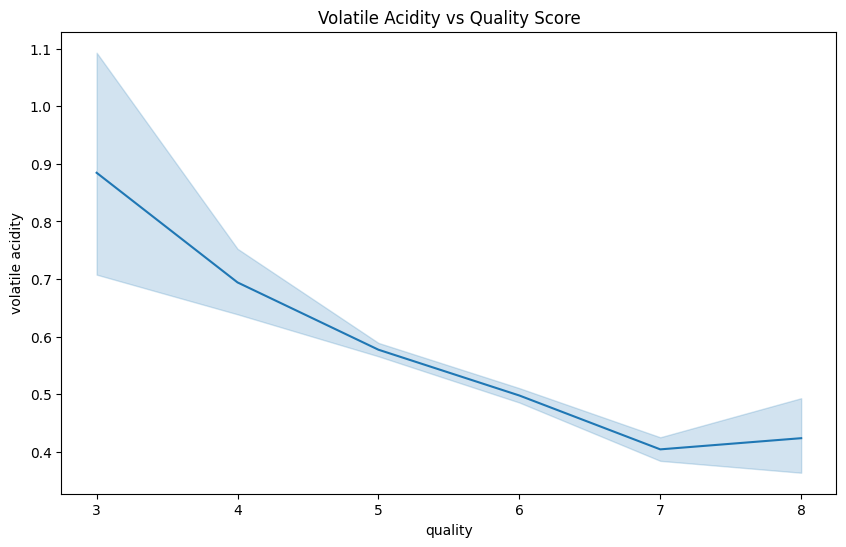

In [260]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.title("Volatile Acidity vs Quality Score")

This graph shows the relationship between ***volatile acidity*** and quality scores of wine. As the quality score increases, volatile acidity decreases significantly, suggesting an inverse relationship between the two. Wines with lower volatile acidity tend to receive higher quality ratings. Based on a quick Google search, I learned that this trend is common across most wines. High volatile acidity, which indicates higher levels of acetic acid (vinegar-like flavors), is typically considered undesirable and negatively affects wine quality. This inverse relationship is supported by oenological studies and is a consistent finding in wine quality research. I figured that a line graph was appropriate here because it effectively shows the trend or pattern in the relationship between the volatile acidity and quality score, more than a bar graph would.

Text(0.5, 1.0, 'Citric Acid Concentration vs Quality Score')

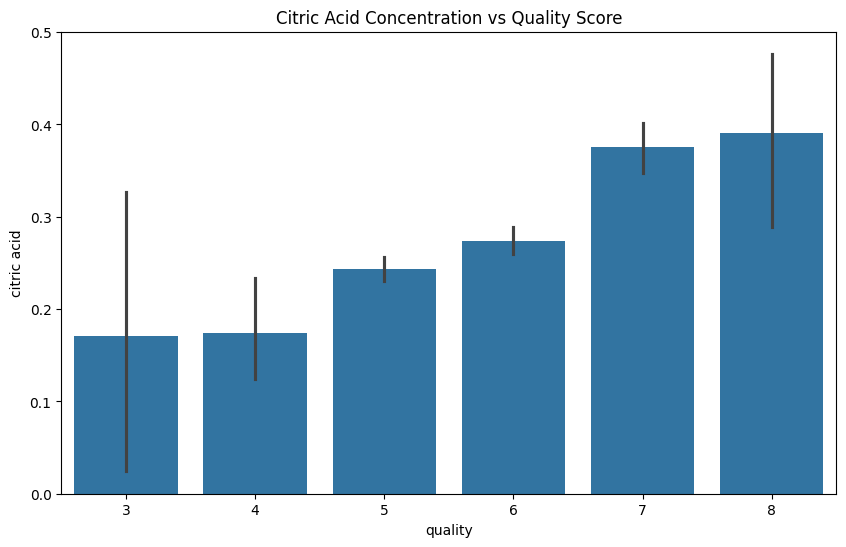

In [261]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.title("Citric Acid Concentration vs Quality Score")

This bar graph shows the relationship between ***citric acid concentration***  and quality scores of wine. As the wine quality score increases, the average citric acid concentration also rises, suggesting a positive relationship between citric acid levels and wine quality. Higher quality wines seem to have higher citric acid content. Again, this seems to represent wine generally speaking as citric acid contributes to the freshness and acidity balance of wines, which is often associated with a more pleasant and crisp taste. Wines with higher citric acid levels are typically viewed as having better structure and complexity, leading to higher quality ratings.

Text(0.5, 1.0, 'Alcohol Concentration vs Quality Score')

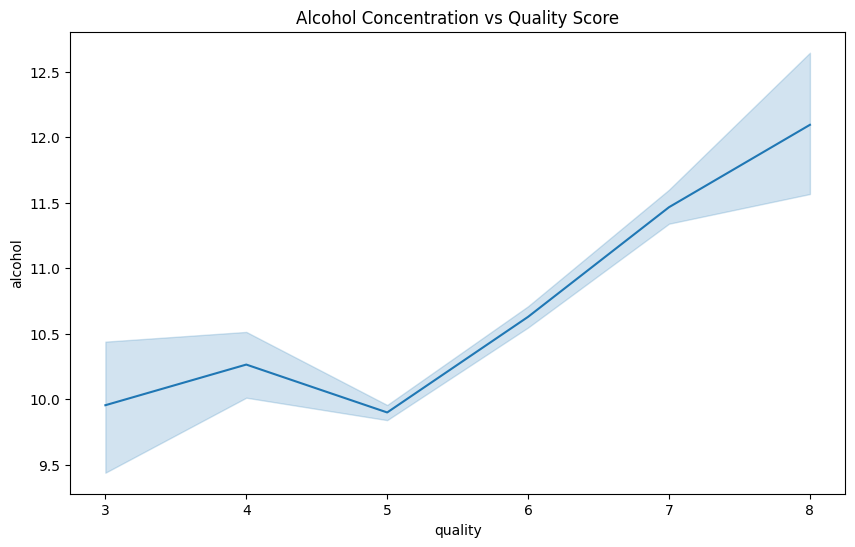

In [262]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'quality', y = 'alcohol', data = wine)
plt.title("Alcohol Concentration vs Quality Score")

This line graph shows the relationship between ***alcohol concentration*** and quality scores of wine. As the wine quality score increases, the alcohol concentration also rises, indicating a strong positive correlation. Higher quality wines tend to have higher alcohol levels. Higher alcohol content often results from riper grapes, which produce more sugar for fermentation, leading to richer and more full-bodied wines. Wines with higher alcohol levels are frequently associated with better structure, balance, and perceived quality.

Text(0.5, 1.0, 'Suplhates Concentration vs Quality Score')

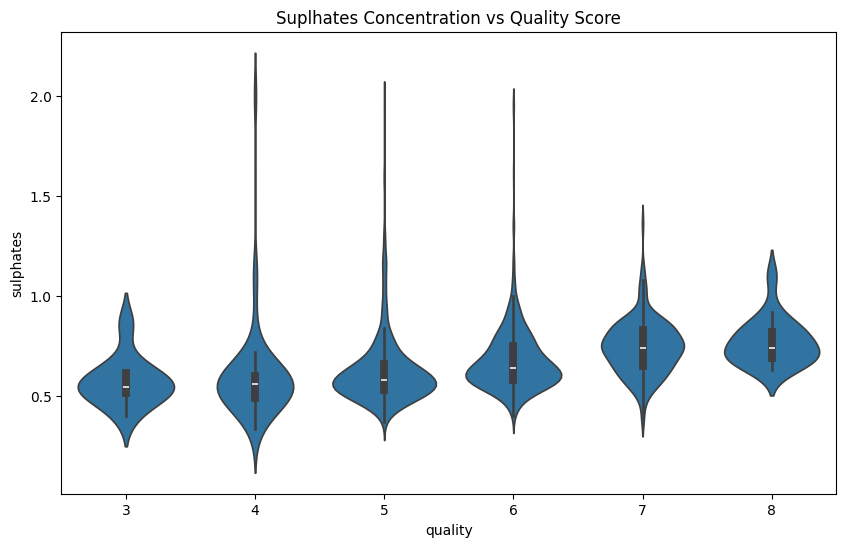

In [263]:
plt.figure(figsize = (10,6))
sns.violinplot(data = wine, x = "quality", y = "sulphates")
plt.title("Suplhates Concentration vs Quality Score")

This violin plot visualizes the distribution of ***sulphates concentration*** across different wine quality scores. As wine quality increases, the median sulphates concentration also tends to rise slightly, with the distributions becoming tighter for higher quality scores. Higher quality wines tend to have sulphates values clustered around a slightly elevated range. As it turns out, sulphates contribute to wine stability and help preserve freshness and aroma, which can positively influence quality. Elevated sulphates, when well-balanced, are associated with higher-quality wines, particularly in controlled production processes. I liked the idea of using violin plots here because it provided a more detailed view than something like a box plot by visualizing the density of the data, highlighting areas where most sulphates values occur.

Text(0.5, 1.0, 'Wine Quality Distribution')

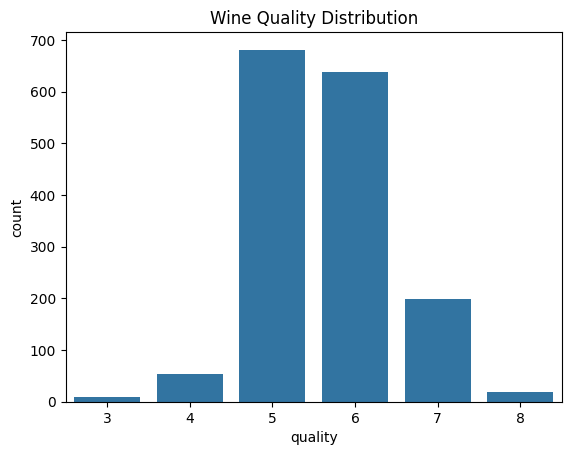

In [264]:
sns.countplot(x = 'quality', data = wine)
plt.title("Wine Quality Distribution")

Not much explanation here - but the variance is not particularly shocking on the data, as most wines fall under score of 5 and 6. The distribution is mostly normal, and the range of scores is from 3 to 8.

##To start, lets perform a Baseline Model

In [265]:
y = wine['quality']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

0.6517605398308277

This test establishes a baseline model to evaluate how well future models will perform when predicting wine quality. The baseline model assumes that every prediction is equal to the mean of the target variable, in this case quality, which is the simplest form of prediction. I will use the resulting MSE of 0.6517 to benchmark the performance of my following predictive models.

##Multiple Regression Model

Moving forward with a multiple regression model is ideal for testing multiple variables against the wine quality as it can evaluate the relationship between several wine properties and the quality score at the same time. The model’s coefficients will likley provide clearer insights into how each variable impacts quality, such as alcohol positively contributing and volatile acidity negatively affecting it. A multiple regression model will also identifies the most significant predictors for me, while controlling for the influence of other features. This data can hypothetically help consumers and wine producers prioritize factors that matter most.

In [302]:
X = wine.drop('quality', axis = 1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [267]:
cat_col = ['alcohol']
transformer = make_column_transformer(
    (
     OneHotEncoder(
         drop='first', sparse_output=False, handle_unknown='ignore'
     ),
     cat_col,
    ),
    remainder='passthrough'
)

In [268]:
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [269]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['alcohol'])])),
                ('model', LinearRegression())])

In [270]:
linreg = pipe.named_steps['model']
coefficients = linreg.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names, columns = ['coefficient'])

,coefficient
onehotencoder__alcohol_8.5,1.792849
onehotencoder__alcohol_8.7,2.374126
onehotencoder__alcohol_8.8,1.701343
onehotencoder__alcohol_9.0,2.329790
onehotencoder__alcohol_9.05,0.892439
...,...
remainder__free sulfur dioxide,0.004517
remainder__total sulfur dioxide,-0.003628
remainder__density,-12.102741
remainder__pH,-0.458557


In [271]:
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.38502438708500875

In [272]:
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.404579473584481

In [273]:
rank = permutation_importance(pipe, X_test, y_test, n_repeats=10)
table = pd.DataFrame(rank['importances_mean'], index = X_train.columns.tolist()).sort_values(by=0, ascending=False)
table

,0
alcohol,0.375590
volatile acidity,0.155203
sulphates,0.104415
total sulfur dioxide,0.048409
pH,0.026948
chlorides,0.026593
fixed acidity,0.023567
free sulfur dioxide,0.004143
residual sugar,0.001807
citric acid,0.000273


The results from my Multiple Linear Regression Model showed that alcohol was the strongest predictor of wine quality, followed by volatile acidity and sulphates. Features like density, residual sugar, and citric acid contributed minimally. The model achieved a MSE of 0.385 on the training data and 0.404 on the test data.

When compared to the baseline model, which had an MSE of 0.6517, the regression model significantly reduced prediction error, showing that incorporating the key features identified in the data meaningfully improves predictive accuracy. These results further validated how important properties like alcohol and acidity can be in determining wine quality and highlight the regression model’s effectiveness over the simpler baseline approach.

## K-Nearest Neighbors (KNN) Regression Model

A K-Nearest Neighbors (KNN) model should be well-suited for testing multiple variables against wine quality because it captures non-linear relationships and adapts to patterns within the data. By evaluating similarities between wines based on all variables, I hope that my KNN model can effectively integrate multiple predictors without assuming a specific relationship between them. Additionally,optimizing n_neighbors ensures the model balances bias and variance, further improving its accuracy.

In [274]:
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [275]:
cat_col = ['alcohol']
transformer = make_column_transformer(
    (
        OneHotEncoder(
            drop='first', sparse_output=False, handle_unknown='ignore'
        ),
        cat_col,
    ),
    remainder=StandardScaler()
)

In [276]:
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [277]:
param_grid = {'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17,]}

In [278]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['alcohol'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]},
             scoring='neg_mean_squared_error')

In [279]:
grid_search.best_params_

{'model__n_neighbors': 11}

In [280]:
k = grid_search.best_estimator_

In [281]:
y_train_preds = k.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.37011094669776873

In [282]:
y_test_preds = k.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.4453770661157025

In [283]:
importance = permutation_importance(k, X_test, y_test, n_repeats=10)
pd.DataFrame(importance['importances_mean'], index=X_train.columns.tolist()).sort_values(by=0, ascending=False)

,0
density,0.110442
sulphates,0.076155
volatile acidity,0.070342
total sulfur dioxide,0.051196
residual sugar,0.038007
chlorides,0.024946
citric acid,0.020041
fixed acidity,0.017032
alcohol,-0.009714
pH,-0.018089


Interestingly, after performing my K-Nearest Neighbors Test, the model achieved a training MSE of 0.3701 and a test MSE of 0.4454, slightly underperforming compared to the Linear Regression model (training MSE = 0.385, test MSE = 0.404). From the feature importance analysis table, columns like density, volatile acidity, and sulphates were identfied as the most influential predictors, differing from Linear Regression where alcohol was the dominant predicitive variable. This discrepancy may be due to a KNN test's focus on capturing non-linear patterns that would end up emphasizing features like density. In wine, density is closely tied to other important attributes, such as sugar content, alcohol concentration, and fermentation levels. Wines with similar densities might have clustered together due to shared characteristics in these properties, which KNN naturally identified when forming neighborhoods. Further, according to articles online, KNN might not be suitable for large datasets due to its computational complexity. The results from this test show that model choice can have an interestig affect on how feature importance is interpreted, depending on the data’s structure and relationships.

##Decision Tree Regression Model

Moving on, I would like to perform a Decision Tree Regression Model. A Decision Tree Regression Model is effective for testing multiple variables against wine quality because it can capture non-linear relationships and interactions between features, such as alcohol and sulphates. It ranks features based on their importance accross the entire dataset, providing clear insights into which variables most influence wine quality. Additionally, I like that decision trees are highly visual, showing exactly how splits are made during the process

In [284]:
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [285]:
category_col = ['alcohol']
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoder = make_column_transformer(
    (ohe, category_col),
    verbose_feature_names_out=False,
    remainder='passthrough'
)

In [286]:
param_grid = {'max_depth': range(1, 21)}
tree = DecisionTreeRegressor()
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best max_depth:", grid_search.best_params_['max_depth']) #recheck best max depth

Best max_depth: 3


In [288]:
dtree_model = DecisionTreeRegressor(max_depth=3, criterion='squared_error')
dtree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'alcohol <= 10.525\nsquared_error = 0.667\nsamples = 1279\nvalue = 5.622'),
 Text(0.25, 0.625, 'sulphates <= 0.635\nsquared_error = 0.437\nsamples = 791\nvalue = 5.357'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'sulphates <= 0.525\nsquared_error = 0.355\nsamples = 507\nvalue = 5.231'),
 Text(0.0625, 0.125, 'squared_error = 0.281\nsamples = 156\nvalue = 5.026'),
 Text(0.1875, 0.125, 'squared_error = 0.361\nsamples = 351\nvalue = 5.322'),
 Text(0.375, 0.375, 'volatile acidity <= 0.355\nsquared_error = 0.504\nsamples = 284\nvalue = 5.581'),
 Text(0.3125, 0.125, 'squared_error = 0.481\nsamples = 51\nvalue = 6.098'),
 Text(0.4375, 0.125, 'squared_error = 0.438\nsamples = 233\nvalue = 5.468'),
 Text(0.75, 0.625, 'sulphates <= 0.585\nsquared_error = 0.739\nsamples = 488\nvalue = 6.053'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'volatile acidity <= 0.99\nsquared_error = 0.809\nsamples = 125\nvalue = 5.464'),
 Text(0.5625, 0.125, 'squared_error = 0.635\nsa

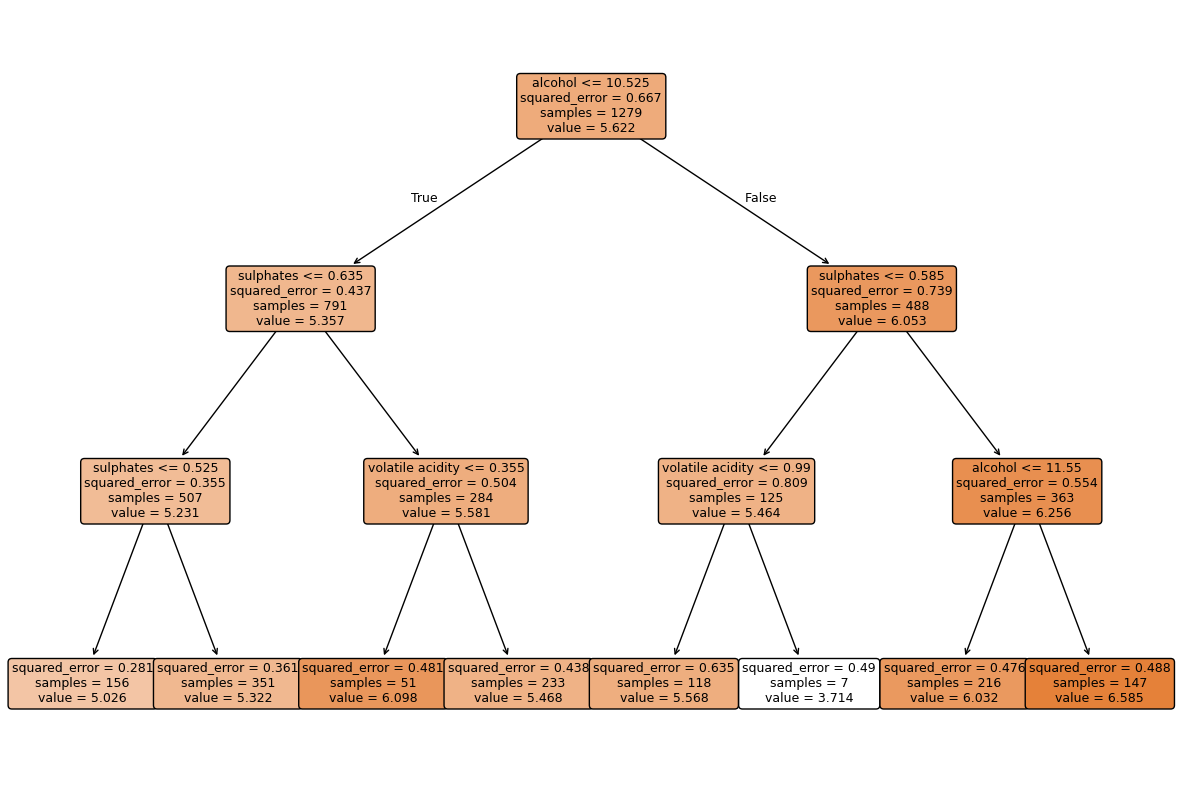

In [294]:
plt.figure(figsize=(15, 10))
plot_tree(dtree_model, feature_names=X_train.columns, filled=True, rounded=True, fontsize=9)

In [290]:
y_train_prediction = dtree_model.predict(X_train)
mean_squared_error(y_train, y_train_prediction)

0.4299322342895778

In [291]:
y_test_prediction = dtree_model.predict(X_test)
mean_squared_error(y_test, y_test_prediction)

0.4391995721406203

In [292]:
rank = permutation_importance(dtree_model, X_test, y_test, n_repeats=10)
pd.DataFrame(rank['importances_mean'], index=X_train.columns.tolist()).sort_values(by=0, ascending=False)

,0
alcohol,0.350276
sulphates,0.187931
volatile acidity,0.058892
fixed acidity,0.000000
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000
total sulfur dioxide,0.000000
density,0.000000


The Decision Tree Regression Model identified alcohol as the most important feature, followed by sulphates and volatile acidity, while all other features had little to no importance. This lines up with my results from my Multiple Regression Model. The model’s optimal depth was determined as 3 through GridSearchCV. The MSE on the test dataset was 0.439, and the training set was 0.4299, showing reasonable fit but slightly higher error compared to the KNN and Linear Regression models. The tree visualization highlighted alcohol as the primary splitting variable, reaffirming its strong predictive relationship with wine quality. Unlike KNN, the Decision Tree did not emphasize features like density, suggesting it prioritizes variables with imapact accross the entire dataset. These results demonstrate the Decision Tree’s strength in identifying dominant features but also its limitations in capturing subtle patterns compared to models like KNN.

##Random Forest Regression Model

I have gone with a A Random Forest Regression Model for my final test. Random Forest Regression Model's are ideal for testing multiple variables against wine quality because it combines the strengths of multiple decision trees to improve its accuracy and reduce overfitting. By averaging predictions from numerous trees, it will be able to capture non-linear relationships and interactions between the features in my dataset. Additionally, these models handle large numbers of variables effectively and reduces bias by using randomized splits, making it well-suited for complex datasets like my own.

In [295]:
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [296]:
category_col = ['alcohol']
transformer = make_column_transformer(
    (
        OneHotEncoder(
            drop='first', sparse_output=False, handle_unknown='ignore'
        ),
        category_col,
    ),
    remainder='passthrough'
)

In [297]:
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [298]:
param_grid = {'model__n_estimators': [50,100,150,200], 'model__max_depth': [10,20,30,40,50]}

In [208]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['alcohol'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [10, 20, 30, 40, 50],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [209]:
grid_search.best_params_

{'model__max_depth': 30, 'model__n_estimators': 150}

In [210]:
forest = grid_search.best_estimator_

In [211]:
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.0486055287954889

In [212]:
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

0.3490074648067642

In [299]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.82      0.77       130
           6       0.69      0.71      0.70       136
           7       0.79      0.59      0.68        44
           8       0.00      0.00      0.00         2

    accuracy                           0.71       320
   macro avg       0.37      0.35      0.36       320
weighted avg       0.69      0.71      0.70       320



In [214]:
rank = permutation_importance(forest, X_test, y_test, n_repeats=10)
pd.DataFrame(rank['importances_mean'], index=X_train.columns.tolist()).sort_values(by=0, ascending=False)

,0
sulphates,0.348090
density,0.215162
volatile acidity,0.105746
total sulfur dioxide,0.066042
residual sugar,0.049894
chlorides,0.035668
alcohol,0.028625
fixed acidity,0.026766
citric acid,0.025685
pH,0.010247


The Random Forest Regression Model achieved strong performance, with a test MSE of 0.349, and a train MSE of 0.049, the lowest among all tested models. Hyperparameter tuning identified 150 estimators and a maximum depth of 30 as the optimal settings, improving the model’s ability to generalize. Interestingly, sulphates and density ranked as the most important features, followed by volatile acidity, while alcohol, previously dominant in Linear Regression and Decision Tree models, ranked much lower. This difference arises because Random Forests reduce overfitting by averaging predictions across multiple decision trees, where splits based on alcohol may be diluted by other variables. Additionally, sulphates and density may have stronger non-linear relationships with wine quality, which Random Forests are better at detecting compared to linear or single-tree models.

##Key Findings:
- Random Forest Regression Performance:
The Random Forest Regression Model emerged as the best-performing model, achieving the lowest MSE of 0.349 on the test data, compared to 0.404 for Multiple Linear Regression, 0.445 for KNN, and 0.439 for Decision Tree.
- Most Influential Features:
Across all the models, we saw some variation in the most influential features, with alcohol, density, sulphates, and volatile acidity being featured as the most important predictors of wine quality in different tests.
- Model-Specific Insights:
  - Linear Regression: Alcohol was the most significant predictor due to its strong linear relationship with wine quality.
  - KNN: Density gained importance as KNN captured non-linear relationships within the data.
  - Decision Tree: Alcohol remained the top predictor, while the tree structure provided interpretability at the cost of slightly higher MSE.
  - Random Forest: In the best performing model overall, sulphates and density emerged as the most important features, as Random Forest effectively captured non-linear relationships and feature interactions by averaging predictions across multiple decision trees.
- Feature Interactions:
The Random Forest model’s results suggest that features like density and sulphates have subtle but crucial interactions with other variables that linear models were simply unable to capture.
- Baseline Comparison:
All models outperformed the baseline MSE of 0.6517, demonstrating their ability to predict wine quality and emphasizing the importance of different wine properties in influencing wine ratings.

##Next Steps & Potential Improvements:
- Incorporate Additional Features:
  - I think that introducing external factors like grape variety, region-specific climate data, or production techniques has the potential to improve model performance and make for interesting results.
  - Including aspects like sensory descriptions (taste profiles and aroma notes) to provide more context for wine quality scores could also be beneficial.
- More Advanced Feature Engineering:
  - I think that transforming or combining existing features within the dataset, such as creating an alcohol-to-density ratio, to uncover hidden relationships could be interesting in gaining a better understaning of how certain variables in wine interact iwth each other
- Cross-Validation and Scaling:
  - Using some additional cross-validation techniques to ensure robustness and consistency of model results. Doing this could improve models like the K-Nearest Neighbors Regression Model.
